<a href="https://colab.research.google.com/github/hhasan9979/ML-in-Action/blob/main/Assignment_3_Machine_Learning_in_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import time as time 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import plotly.express as px
import seaborn as sns

# Abstract

#### This is a small machine learning project using two different datasets to make some predictions. The first dataset I will use is [Spotify Song Data](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) which I downloaded from Kaggle. Spotify song data is very interesting to me. Almost everyone listens to music and now more than ever we even have more song artists. However, how do you know if a song will become popular. Every music producer hopes their music will become popular. Spotify songs include some features such as danceability, energy and liveness which can contribute to a particular song being popular. I want to find out if different ml models can predict popularity of a song using these other features. I will use linear regression and support vector regression to predict these values. 
#### The second dataset I will be looking at is [NBA data](https://www.kaggle.com/mcamli/nba17-18) for the season 2017-18. This is nba player statistics for each player that was active in that specific season. I will be looking to classify players' positions according to their statistics. I will be using SVM to help me classify this data. I find nba data very interesting because I also watch basketball sometimes. I have done some project using basketball data and I have never done this specific project so I thought it could be interesting. I am hoping to find out which player classification will be the best. 

In [ ]:
spotify = pd.read_csv("https://raw.githubusercontent.com/hhasan9979/ML-in-Action/main/newSpotifyFeatures2.csv")

## Spotify Song Data

### 1. Regression Dataset Prep

In [ ]:
spotify.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


In [ ]:
spotify.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

#### The dataset is a collection of songs from spotify with some feature variables that define each song for each row. Spotify has a develop platform where you can download these song data. I would like to use some of the features from the dataset to predict the popularity of songs. I would also like to find out which feature most contributes to the popularity of the songs. 

In [ ]:
spotify.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [ ]:
spotify.shape

(38259, 14)

In [ ]:
dup = spotify[spotify.duplicated(['track_name', 'artist_name'])]
dup.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
22254,Rock,B.B. King,The Thrill Is Gone,6gRGLfswEsfpy1UxHEyP6X,63,0.08540,0.693,0.489,0.002340,0.131,-9.709,0.0316,87.085,0.262
22874,Rock,All Time Low,Remembering Sunday,3F274sv7NCtXfu88YEEhXd,54,0.14900,0.449,0.602,0.000000,0.141,-4.800,0.0264,170.040,0.320
34276,Country,Florida Georgia Line,Sun Daze,0DwqCrFWlHE2Aq2Mq2dAUt,0,0.08870,0.484,0.944,0.000000,0.471,-3.652,0.0411,170.065,0.847
34587,Country,Thomas Rhett,Drink A Little Beer,7lj7m5ZP8BgPG21S32jEzX,0,0.00752,0.336,0.824,0.000000,0.322,-4.653,0.2530,168.080,0.783
37673,Rock,Five For Fighting,100 Years,0B5KeB25moPkcQUnbDvj3t,62,0.54400,0.643,0.569,0.000022,0.178,-7.459,0.0276,120.507,0.275


In [ ]:
spotify[spotify['track_name'] == "Go To Town"]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence


#### This dataset initially had many duplicates. However, the data was too large to save to github so I removed duplicates before opening it here. I used the below statement to remove them.

In [ ]:
spotify = spotify.drop_duplicates(subset=['track_id'], keep='first')
spotify[spotify['track_name'] == "Go To Town"]
spotify.shape
### Initially the data was almost 300,000 rows of data

(38259, 14)

#### Find unique genres and how many there are in the data

In [ ]:
spotify['genre'].unique()

array(['Movie', 'Country', 'Anime', 'Rap', 'Pop', 'Jazz', 'Rock'],
      dtype=object)

In [ ]:
spotify = pd.read_csv("https://raw.githubusercontent.com/hhasan9979/ML-in-Action/main/newSpotifyFeatures2.csv")
# spotify = spotify[spotify['genre'] == 'Soundtrack']

#### Find the range of values for each quantitative  column

In [ ]:
spotify.describe()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000
mean,34.983873,0.407546,0.538538,0.555427,0.175961,0.193895,-9.439445,0.076553,119.680225,0.483587
std,19.502937,0.354370,0.160605,0.270465,0.327268,0.160468,5.437758,0.104958,31.230662,0.251429
min,0.000000,0.000000,0.059600,0.000216,0.000000,0.012000,-41.234000,0.022300,32.080000,0.000000
25%,20.000000,0.053300,0.437000,0.338000,0.000000,0.098300,-12.332000,0.033500,94.372000,0.280000
50%,37.000000,0.326000,0.551000,0.573000,0.000035,0.128000,-8.215000,0.042200,117.923000,0.479000
75%,48.000000,0.761000,0.651000,0.790000,0.090550,0.244000,-5.370000,0.067600,140.044500,0.683500
max,99.000000,0.996000,0.976000,0.999000,0.997000,0.994000,1.893000,0.965000,239.848000,1.000000


In [ ]:
s_features = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence']

#### Plotting some feature variables with target variable on scatterplot

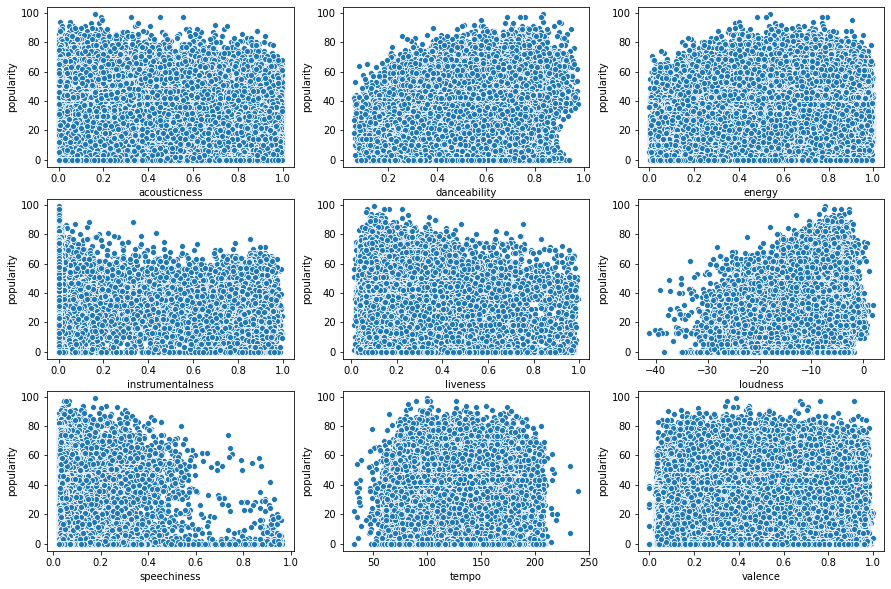

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(s_features, ax.flatten()):
    sns.scatterplot(x=var, y='popularity', data=spotify, ax=subplot)

#### Correlation Heatmap

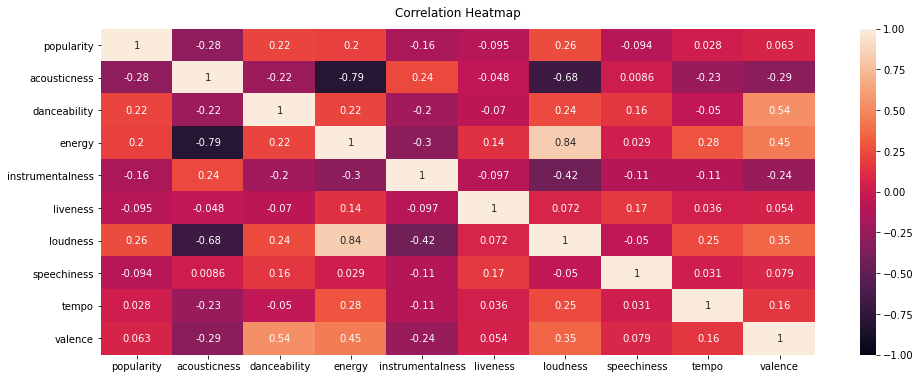

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(spotify.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### It seems like there are some variables that have higher correlation that others. Some of variables with the highest correlation to popularity are danceability(.22), energy(.2), and loudness(.26). I will use loudness as the feature variable and popularity as the target variable.

### 2. Regression

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import cross_val_score
xtrain, xtest, ytrain, ytest = train_test_split(spotify['loudness'].values.reshape(-1,1),spotify['popularity'],test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(xtrain, ytrain)
lr_score = lr.score(xtest, ytest)
print ("Linear Regression")
print(f"Testing Data Score: {lr_score}")


Linear Regression
Testing Data Score: 0.0707350239512764


#### I tried changing the feature variables that I use. However, that did not increase the testing accuracy score. So now I will use a different machine learning algorithm.

In [ ]:
# s_features = ['acousticness', 'danceability', 'energy',
#        'instrumentalness', 'liveness', 'loudness',
#        'speechiness', 'tempo', 'valence']
xtrain, xtest, ytrain, ytest = train_test_split(spotify['loudness'].values.reshape(-1,1),spotify['popularity'],test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(xtrain, ytrain)
log_score = log.score(xtest, ytest)
print ("Logistic Regression")
print(f"Testing Data Score: {log_score}")

Logistic Regression
Testing Data Score: 0.050967067433350756


/Users/hass/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### I tried running SVR but it took too long

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVC 
# svr = SVC(C=1.0, kernel='poly', degree=3, gamma=2,max_iter = 1e5).fit(xtrain, ytrain)
# svr_score = svr.score(xtest, ytest)
# print ("Support Vector Regression")
# print(f"Testing Data Score: {svc_score}")

In [ ]:
# s_features = ['acousticness', 'danceability', 'energy',
#        'instrumentalness', 'liveness', 'loudness',
#        'speechiness', 'tempo', 'valence']
xtrain, xtest, ytrain, ytest = train_test_split(spotify['loudness'].values.reshape(-1,1),spotify['popularity'],test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(xtrain, ytrain)
rfc_score = rfc.score(xtest, ytest)
print ("RFC Regression")
print(f"Testing Data Score: {rfc_score}")

RFC Regression
Testing Data Score: 0.019079979090433873


#### Visualize the Linear Regression (most accurate)

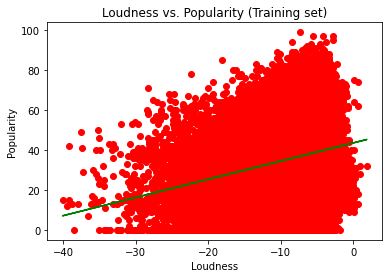

In [ ]:
# s_features = ['acousticness', 'danceability', 'energy',
#        'instrumentalness', 'liveness', 'loudness',
#        'speechiness', 'tempo', 'valence']
# from sklearn.model_selection import train_test_split
# # from sklearn.metrics import mean_absolute_error
# # from sklearn.metrics import mean_squared_error
# # from sklearn.model_selection import cross_val_score
# xtrain, xtest, ytrain, ytest = train_test_split(spotify[s_features],spotify['popularity'],test_size=0.2,random_state=1)
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression().fit(xtrain, ytrain)
# lr_score = lr.score(xtest, ytest)
# print ("Linear Regression")
# print(f"Testing Data Score: {lr_score}")


###########
# ypred = lr.predict(xtest)
plt.scatter(xtrain, ytrain, color = "red")
plt.plot(xtrain, lr.predict(xtrain), color = "green")
plt.title("Loudness vs. Popularity (Training set)")
plt.xlabel("Loudness")
plt.ylabel("Popularity")
plt.show()

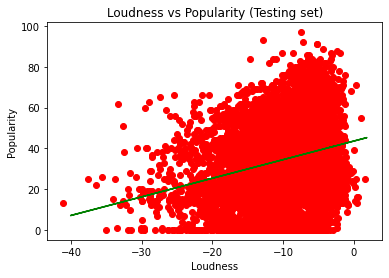

In [ ]:
plt.scatter(xtest, ytest, color = "red")
plt.plot(xtrain, lr.predict(xtrain), color = "green")
plt.title("Loudness vs Popularity (Testing set)")
plt.xlabel("Loudness")
plt.ylabel("Popularity")
plt.show()

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[0.91081233]
43.571952330525086


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, lr.predict(xtest)))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, lr.predict(xtest)))
print('R2 score is:', metrics.r2_score(ytest, lr.predict(xtest)))

Mean Absolute Error: 15.280241477580013
Mean Squared Error: 350.4865100715756
R2 score is: 0.0707350239512764


#### Mean absolute error is 15.28 which shows that our algorithm is not that accurate.
#### The value of the mean squared error is 350.49 which shows that we have alot of outliers.
#### The R2  score is 0.07 and it shows that our model is really bad and doesn’t fit data very well.
#### The linear regression model score is also really low. So it is not that accurate for prediction. I don't think any of the feature variables alone are good predictors of popularity of music. I think there are extraneous variables we are not taking into account which contributes to a songs popularity. I have tried using a feature variable other than loudness. However, loudness performed the best. I also used logistic regression to see if the model would predict popularity better. It did not. The accuracy was worse. 

## NBA DATA

This is the [NBA Data](https://www.kaggle.com/mcamli/nba17-18) from the 2017-2018 season. This data includes only player statistics for all the active players in this specific season. Each nba player has a position they play on the court. For this data, I will be classifying player positions based on the statistics of each player. I believe it will be quite difficult to get high accuracies for all the players. 

### 3. Classification Dataset Prep

In [ ]:
nba_data = pd.read_csv("https://raw.githubusercontent.com/hhasan9979/ML-in-Action/main/nba.csv")

In [ ]:
nba_data.head(10)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,1134,9.0,0.567,0.759,...,NaN,1.3,1.0,2.2,0.094,NaN,-0.5,-1.7,-2.2,-0.1
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,1359,8.2,0.525,0.800,...,NaN,-0.1,1.1,1.0,0.036,NaN,-2.0,-0.2,-2.2,-0.1
2,3,Steven Adams\adamsst01,C,24,OKC,76,2487,20.6,0.630,0.003,...,NaN,6.7,3.0,9.7,0.187,NaN,2.2,1.1,3.3,3.3
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,1368,15.7,0.570,0.021,...,NaN,2.3,1.9,4.2,0.148,NaN,-1.6,1.8,0.2,0.8
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,682,5.8,0.516,0.432,...,NaN,-0.1,0.2,0.1,0.009,NaN,-4.1,-1.8,-5.8,-0.7
5,6,Cole Aldrich\aldrico01,C,29,MIN,21,49,6.0,0.340,0.000,...,NaN,-0.1,0.1,0.0,-0.013,NaN,-7.0,0.1,-6.9,-0.1
6,7,LaMarcus Aldridge\aldrila01,C,32,SAS,75,2509,25.0,0.570,0.068,...,NaN,7.4,3.5,10.9,0.209,NaN,3.0,0.3,3.3,3.3
7,8,Jarrett Allen\allenja01,C,19,BRK,72,1441,17.5,0.636,0.038,...,NaN,2.7,1.5,4.2,0.141,NaN,-1.3,1.4,0.2,0.8
8,9,Kadeem Allen\allenka01,PG,25,BOS,18,107,2.6,0.366,0.500,...,NaN,-0.2,0.1,-0.1,-0.039,NaN,-6.7,0.3,-6.4,-0.1
9,10,Tony Allen\allento01,SF,36,NOP,22,273,8.7,0.514,0.132,...,NaN,-0.2,0.2,0.1,0.017,NaN,-4.0,-1.3,-5.2,-0.2


In [ ]:
nba_data.shape

(664, 29)

In [ ]:
nba_data.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [ ]:
nba_data['Pos'].value_counts()

SG       156
PG       142
C        126
PF       122
SF       115
SF-SG      2
PG-SG      1
Name: Pos, dtype: int64

#### There should only be 5 main positions in basketball. Point guard(PG), shooting guard(SG), small foward(SF), power foward(PF) and center(C). There are 2 positions where players maybe play 2 types of positions which is why there are SF-SG and PG-SG values. I will change those so it only includes the first position. 

In [ ]:
nba_data['Pos'] = nba_data['Pos'].map(lambda x: x[:2] if len(x) > 2 else x)

In [ ]:
nba_data

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,1134,9.0,0.567,0.759,...,NaN,1.3,1.0,2.2,0.094,NaN,-0.5,-1.7,-2.2,-0.1
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,1359,8.2,0.525,0.800,...,NaN,-0.1,1.1,1.0,0.036,NaN,-2.0,-0.2,-2.2,-0.1
2,3,Steven Adams\adamsst01,C,24,OKC,76,2487,20.6,0.630,0.003,...,NaN,6.7,3.0,9.7,0.187,NaN,2.2,1.1,3.3,3.3
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,1368,15.7,0.570,0.021,...,NaN,2.3,1.9,4.2,0.148,NaN,-1.6,1.8,0.2,0.8
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,682,5.8,0.516,0.432,...,NaN,-0.1,0.2,0.1,0.009,NaN,-4.1,-1.8,-5.8,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,537,Tyler Zeller\zellety01,C,28,BRK,42,703,15.3,0.587,0.114,...,NaN,1.0,0.6,1.5,0.105,NaN,-1.9,-0.6,-2.5,-0.1
660,537,Tyler Zeller\zellety01,C,28,MIL,24,406,17.1,0.622,0.019,...,NaN,1.1,0.3,1.4,0.163,NaN,0.3,-0.4,-0.1,0.2
661,538,Paul Zipser\zipsepa01,SF,23,CHI,54,824,5.2,0.445,0.470,...,NaN,-1.2,0.6,-0.6,-0.034,NaN,-5.5,-0.3,-5.9,-0.8
662,539,Ante Zizic\zizican01,C,21,CLE,32,214,24.2,0.746,0.000,...,NaN,0.9,0.2,1.0,0.231,NaN,1.3,-1.2,0.1,0.1


In [ ]:
nba_data['Pos'].value_counts()

SG    156
PG    143
C     126
PF    122
SF    117
Name: Pos, dtype: int64

In [ ]:
nba_data.describe()

,Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
count,664.000000,664.000000,664.000000,664.000000,664.000000,660.000000,660.000000,660.000000,664.000000,664.000000,...,0.0,664.000000,664.000000,664.000000,664.000000,0.0,664.000000,664.000000,664.000000,664.000000
mean,270.823795,26.194277,43.280120,972.881024,12.719880,0.528718,0.342206,0.249379,4.744428,14.918072,...,NaN,1.041265,0.974398,2.017771,0.071419,NaN,-1.669428,-0.715361,-2.384940,0.465211
std,154.830333,4.127665,27.743598,836.159716,8.713523,0.135837,0.233292,0.263980,4.552463,8.046967,...,NaN,1.757985,1.027690,2.571878,0.154053,NaN,5.093578,2.721298,6.079733,1.148930
min,1.000000,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,-2.400000,0.000000,-0.900000,-1.065000,NaN,-38.900000,-20.100000,-59.000000,-1.300000
25%,139.000000,23.000000,17.000000,186.000000,9.200000,0.494000,0.161750,0.143000,1.700000,10.075000,...,NaN,0.000000,0.100000,0.100000,0.028750,NaN,-3.300000,-1.900000,-4.225000,-0.100000
50%,266.500000,26.000000,46.000000,755.000000,12.650000,0.540000,0.355500,0.221000,3.200000,13.900000,...,NaN,0.400000,0.600000,1.100000,0.079000,NaN,-1.300000,-0.600000,-1.800000,0.000000
75%,401.250000,29.000000,71.000000,1651.500000,16.200000,0.581250,0.486250,0.313000,6.800000,18.925000,...,NaN,1.600000,1.500000,3.100000,0.120000,NaN,0.200000,0.700000,0.300000,0.700000
max,540.000000,41.000000,82.000000,3026.000000,133.800000,1.500000,1.000000,5.333000,36.000000,100.000000,...,NaN,11.600000,5.700000,15.400000,2.712000,NaN,68.600000,16.300000,54.400000,8.900000


#### Map the positions to integers

In [ ]:
def maptoInt(x):
    if x == 'PG':
        return 0
    elif x == 'SG':
        return 1
    elif x == 'SF':
        return 2
    elif x == 'PF':
        return 3
    else:
        return 4

In [ ]:
nba_data['Position'] = nba_data['Pos'].apply(maptoInt)
nba_data

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Position
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,1134,9.0,0.567,0.759,...,1.3,1.0,2.2,0.094,NaN,-0.5,-1.7,-2.2,-0.1,1
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,1359,8.2,0.525,0.800,...,-0.1,1.1,1.0,0.036,NaN,-2.0,-0.2,-2.2,-0.1,3
2,3,Steven Adams\adamsst01,C,24,OKC,76,2487,20.6,0.630,0.003,...,6.7,3.0,9.7,0.187,NaN,2.2,1.1,3.3,3.3,4
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,1368,15.7,0.570,0.021,...,2.3,1.9,4.2,0.148,NaN,-1.6,1.8,0.2,0.8,4
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,682,5.8,0.516,0.432,...,-0.1,0.2,0.1,0.009,NaN,-4.1,-1.8,-5.8,-0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,537,Tyler Zeller\zellety01,C,28,BRK,42,703,15.3,0.587,0.114,...,1.0,0.6,1.5,0.105,NaN,-1.9,-0.6,-2.5,-0.1,4
660,537,Tyler Zeller\zellety01,C,28,MIL,24,406,17.1,0.622,0.019,...,1.1,0.3,1.4,0.163,NaN,0.3,-0.4,-0.1,0.2,4
661,538,Paul Zipser\zipsepa01,SF,23,CHI,54,824,5.2,0.445,0.470,...,-1.2,0.6,-0.6,-0.034,NaN,-5.5,-0.3,-5.9,-0.8,2
662,539,Ante Zizic\zizican01,C,21,CLE,32,214,24.2,0.746,0.000,...,0.9,0.2,1.0,0.231,NaN,1.3,-1.2,0.1,0.1,4


#### Let's see if the mapping worked .... 

In [ ]:
nba_data['Pos'].value_counts()

SG    156
PG    143
C     126
PF    122
SF    117
Name: Pos, dtype: int64

In [ ]:
nba_data['Position'].value_counts()

1    156
0    143
4    126
3    122
2    117
Name: Position, dtype: int64

#### I realized some nba players didn't play as many games. This can skew the player performance. I realized certain column values were 0. In order to change that, I am filtering the data with players who played at least 20 games or more. 

In [ ]:
nba_data = nba_data.loc[(nba_data['G'] >= 20)]
nba_data

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Position
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,1134,9.0,0.567,0.759,...,1.3,1.0,2.2,0.094,NaN,-0.5,-1.7,-2.2,-0.1,1
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,1359,8.2,0.525,0.800,...,-0.1,1.1,1.0,0.036,NaN,-2.0,-0.2,-2.2,-0.1,3
2,3,Steven Adams\adamsst01,C,24,OKC,76,2487,20.6,0.630,0.003,...,6.7,3.0,9.7,0.187,NaN,2.2,1.1,3.3,3.3,4
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,1368,15.7,0.570,0.021,...,2.3,1.9,4.2,0.148,NaN,-1.6,1.8,0.2,0.8,4
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,682,5.8,0.516,0.432,...,-0.1,0.2,0.1,0.009,NaN,-4.1,-1.8,-5.8,-0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,537,Tyler Zeller\zellety01,C,28,BRK,42,703,15.3,0.587,0.114,...,1.0,0.6,1.5,0.105,NaN,-1.9,-0.6,-2.5,-0.1,4
660,537,Tyler Zeller\zellety01,C,28,MIL,24,406,17.1,0.622,0.019,...,1.1,0.3,1.4,0.163,NaN,0.3,-0.4,-0.1,0.2,4
661,538,Paul Zipser\zipsepa01,SF,23,CHI,54,824,5.2,0.445,0.470,...,-1.2,0.6,-0.6,-0.034,NaN,-5.5,-0.3,-5.9,-0.8,2
662,539,Ante Zizic\zizican01,C,21,CLE,32,214,24.2,0.746,0.000,...,0.9,0.2,1.0,0.231,NaN,1.3,-1.2,0.1,0.1,4


### 4. Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
nba_features = ['DRB%', 'AST%', 'STL%']
# x_scaled = preprocessing.scale(nba_data[nba_features])
# y_scaled = preprocessing.scale(nba_data['Position']
x_train, x_test, y_train, y_test = train_test_split(nba_data[nba_features],nba_data['Position'],test_size=0.2,random_state=1)
# nba_data[nba_features].shape
# nba_data['Position'].shape

In [ ]:
from sklearn import svm
nba_classify = svm.SVC(kernel='linear', gamma='auto', C=2).fit(x_train, y_train)

In [ ]:
ypred = nba_classify.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.48      0.50      0.49        22
           2       0.58      0.39      0.47        18
           3       0.39      0.50      0.44        18
           4       0.74      0.61      0.67        23

    accuracy                           0.55        96
   macro avg       0.56      0.56      0.55        96
weighted avg       0.57      0.55      0.55        96



In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

Accuracy: 0.5520833333333334


#### Added more feature to increase accuracy of classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
nba_features = ['DRB%', 'AST%', 'STL%', '3PAr', 'FTr']
# x_scaled = preprocessing.scale(nba_data[nba_features])
# y_scaled = preprocessing.scale(nba_data['Position']
x_train, x_test, y_train, y_test = train_test_split(nba_data[nba_features],nba_data['Position'],test_size=0.2,random_state=1)
# nba_data[nba_features].shape
# nba_data['Position'].shape
from sklearn import svm
nba_classify = svm.SVC(kernel='linear', gamma='auto', C=2).fit(x_train, y_train)
ypred = nba_classify.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.50      0.45      0.48        22
           2       0.53      0.44      0.48        18
           3       0.55      0.61      0.58        18
           4       0.86      0.78      0.82        23

    accuracy                           0.61        96
   macro avg       0.61      0.62      0.61        96
weighted avg       0.62      0.61      0.61        96

Accuracy: 0.6145833333333334


#### According to the scores from precision, recall and score, the classifier works best for different classes. The classifier takes the 3 features and it works best for point guards and centers which are mapped to integers 0 and 4 respectively. We use the features, Defensive rebound percetage, assist percentage and steal percentage to classify the players' positions. It makes sense that point guards and centers are easier to predict because they have more defined roles. Roles such as SG, SF and PF are usually swapped for players because of the similarity of players based on my knowledge of basketball. Power foward(PF) and small foward(SF) positions especially can be swapped because they are both foward positions. Overall, the model is not too accurate. It is not as great as I expected with an overall accuracy score of 61%.

## Conclusion

#### Spotify
- Initially with Spotify data, I thought I would fine some really great correlation between the song features such as loudness, valence and etc. and popularity. However, after applying some ml algorithms such as linear regression and logistic regression, the models were not able to predict the popularity of a song very well. What I initially hypothesised was not true according to the machine learning models. However, something interesting I found from the correlation matrix was that the loudness of a music most contributed to the popularity. I initially thought valance would be the value that most defines popularity. Valence is the measure describing the musical positiveness conveyed by a track. 
- In order to extend this project, I would probably like to breakup the songs by years and genre. I think differenty people listen to different type of music for different reasons. I think some features might be higher in a subset of songs groups by different years and different genres. I can apply ml techniques to these subset of data and then compare popularity. 
#### NBA Data
- The NBA data for classification was very interesting to do analysis. I started off the classification by assuming that it would be very hard to classify the players' positions. However, the model had decent classification scores for point guard (0) and center (4) classifications. These positions had the highest classification accuracies. This makes sense to me because these players have more defined roles. Players who play the following positions, SG, SF and PF, can swap their roles to another role from the 3 roles I mentioned. However, point guards and centers are a little different. Although I did not consider this at the beginning, I definitely realize that now according to my model. 
- I am quite surprised that accuracy increased so significantly for the center position when I added the following feature variables: "3 point attempt rate" and "free throw rate". The f1-score for center position(4) increased by 15. I am kinda of surprised it lowered the accuracy for PG(0) and SG(1) positions. I did not expect this. I believe this maybe have something to do with the fact that centers not as great free throw shooters. However, I understand that more players who play the point guard positions take more 3 point shots and centers positions take least. So I thought this would at least help increase classification for point guards. 
- If I was to extend this project, I would definitely consider doing more research on each position. This way, it can help me figure out who which feature vectors probably have the most impact on the classification of the players. Another good way to maybe improve the scores would be to look at more NBA data. This is NBA data is only a collection of nba data from the year 2017-2018. Maybe a collection of data for the last decade could help improve the accuracy of the classification. 